# Example Python Programs

This notebook contains some example programs to give you an idea of how we can use Python to perform calculations and plot images.

### Contents
1. [Calculating a root of a polynomial function using Newton's method](#Calculating-a-root-of-a-polynomial-function-using-Newton's-method)
1. [Calculating a matrix inverse using Gauss-Jordan elimination](#Calculating-a-matrix-inverse-using-Gauss-Jordan-elimination)
1. [Plotting the Mandelbrot Set](#Plotting-the-Mandelbrot-Set)
1. [Solving a system of ODEs](#Solving-a-system-of-ODEs)

---
## Calculating a root of a polynomial function using Newton's method
[Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) is a numerical algorithm for finding the root of a polynomial function. Let $f$ be a polynomial function which has a root at $x$ such that $f(x)=0$ then $x$ can be approximated using the iterative scheme

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},$$

where $f'$ is the derviative of $f$. The scheme is started with an initial guess value $x_0$.

For example consider the function $f(x) = x^2 - 4x - 7$. Here $f'(x) = 2x - 4$ so Newton's method for this function is

$$x_{n+1} = x_n - \frac{x_n^2 - 4x_n - 7}{2x_n - 4},$$

and using a starting value of $x_0=5$ we have

\begin{align*}
    x_0 &= 5, \\
    x_1 &= 5 - \frac{5^2 - 4(5) - 7}{2(5) - 4} = 5.333333, \\
    x_2 &= 5.333333 - \frac{5.333333^2 - 4(5.333333) - 7}{2(5.333333) - 4} = 5.316667, \\
    x_3 &= 5.316667 - \frac{5.316667^2 - 4(5.316667) - 7}{2(5.316667) - 4} = 5.316625, \\
    x_4 &= 5.316625 - \frac{5.316625^2 - 4(5.316625) - 7}{2(5.316625) - 4} = 5.316625.
\end{align*}

The difference in the values obtained in the last two iterations agree to six decimal places so we know this is close to the actual root. When using numerical methods, we use a *convergence tolerance* $tol$ which is some small number and we cease iterations when $|x_{n+1} - x_n| < tol$. The smaller the value of $tol$ the more accurate our approximation is but will require more iterations, and therefore computational effort, to calculate.

The program below uses Newton's method to find this root. Note that using functions to calculate $f(x)$ and $f'(x)$ means that we can easily adapt it to find the roots of other polynomial functions.

In [1]:
def f(x):
    """
    This function defines the polynomial f(x)
    """
    return x**2 - 4*x - 7

def df(x):
    """
    This function defines the derivative of the polynomial f(x)
    """
    return 2*x - 4

# Define parameters
x0 = 5     # starting value
tol = 1e-6 # convergence tolerance
diff = 1   # absolute difference between two successive iterations
n = 0      # iteration counter

# Table column headings
print("  n |   x_n    |   diff\n--------------------------")
print("{:3d} | {:8.6f} | {:8.6f}".format(n, x0, diff))

# Iterative loop
while diff > tol:
    
    # Calculate new value of x using Newton's method
    x1 = x0 - f(x0)/df(x0)
    
    # Update diff, x0 and iteration counter
    diff = abs(x1 - x0)
    x0 = x1
    n = n + 1

    # Print current iteration
    print("{:3d} | {:8.6f} | {:8.6f}".format(n, x0, diff))
    
# Print root and number of iterations required
print("\nThe root of the polynomial function is {:0.6f}.".format(x0))
print("Newton's method took {} iterations to converge.".format(n))

  n |   x_n    |   diff
--------------------------
  0 | 5.000000 | 1.000000
  1 | 5.333333 | 0.333333
  2 | 5.316667 | 0.016667
  3 | 5.316625 | 0.000042
  4 | 5.316625 | 0.000000

The root of the polynomial function is 5.316625.
Newton's method took 4 iterations to converge.


We can plot the function to see where the roots are. 

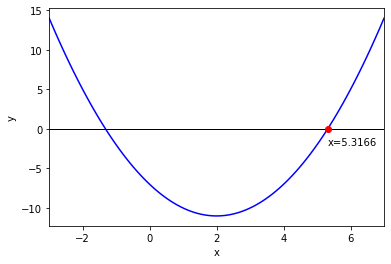

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -3, 7
x = np.linspace(xmin, xmax, 100)

# Plot function and x-axis
fig, ax = plt.subplots()
ax.plot(x, f(x), 'b-')
ax.plot([xmin, xmax], [0, 0], 'k-', linewidth=1)

# Plot root
ax.plot(x0, 0, 'ro')
ax.text(x0,-2, 'x={:0.4f}'.format(x0))

# Configure axes
ax.set_xlim(xmin, xmax)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Try altering the program to find the other root of this polynomial.

---
## Calculating a matrix inverse using Gauss-Jordan elimination
One method of calculating the inverse of a matrix $A$ is to form an augmented matrix $(A|I)$ and use [Guass-Jordan elimination](https://en.wikipedia.org/wiki/Gaussian_elimination) to row reduce the left-hand matrix to reduced row echelon form (i.e., the left-hand matrix becomes the identity matrix). The right-hand matrix is now $A^{-1}$.

For example, consider $A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$

\begin{align*}
    & & 
    & \left( \begin{array}{cc|cc} 1 & 2 & 1 & 0 \\ 3 & 4 & 0 & 1 \end{array} \right)
    \begin{array}{c} \\ R_2 \to R_2 - 3R_1 \end{array} &
    & \longrightarrow &
    & \left( \begin{array}{cc|cc} 1 & 2 & 1 & 0 \\ 0 & -2 & -3 & 1 \end{array} \right)
    \begin{array}{c} \\ R_2 \to -\frac{1}{2}R_2 \end{array} \\
    & \longrightarrow &
    & \left( \begin{array}{cc|cc} 1 & 2 & 1 & 0 \\ 0 & 1 & \frac{3}{2} & -\frac{1}{2} \end{array} \right)
    \begin{array}{c} R_1 \to R_1 - 2R_2 \\ \phantom{x}\end{array} &
    & \longrightarrow &
    & \left( \begin{array}{cc|cc} 1 & 0 & -2 & 1 \\ 0 & 1 & \frac{3}{2} & -\frac{1}{2} \end{array} \right)
\end{align*}

So $A^{-1}=\begin{pmatrix} -2 & 1 \\ \frac{3}{2} & -\frac{1}{2} \end{pmatrix}$. We can check this using $A^{-1}A=I$

$$\begin{pmatrix} -2 & 1 \\ \frac{3}{2} & -\frac{1}{2} \end{pmatrix}
\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} =
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}.$$

The code cell below contains a function which performs Gauss-Jordan elimination to row reduce a matrix `A` to reduced row echelon form. 

In [0]:
def gauss_jordan(A):
    """
    This function performs elementary row operations on the matrix A
    to row reduce to reduced row echelon form.
    """
    rows, cols = A.shape
    for i in range(rows):
        
        # If pivot element is zero swap pivot row with the row with 
        # the first non-zero element in the pivot column below
        if A[i,i] == 0:
            for j in range(i+1, rows):
                if A[j,i] != 0:
                    A[i,:], A[j,:] = A[j,:], A[i,:]
                    break
        
        # Contine to next column if pivot is still zero
        if A[i,i] == 0:
            continue
        
        # Loop through rows of A and perform row operations
        A[i,:] = A[i,:] / A[i,i]
        for j in range(rows):
            
            # Ignore pivot row
            if i == j:
                continue
                
            # Perform row operation
            A[j,:] = A[j,:] - A[j,i]*A[i,:]
        
    return A

The code cell below contains a function that forms the augmented matrix $(A|I)$ and then calls the `gauss-jordan` function to perform the row reduction. The right-hand side of the augmented matrix is returned.

In [0]:
def inv(A):
    """ 
    This function calculates the inverse of the matrix A using 
    Gauss-Jordan elimination
    """
    
    # Check that A is a square matrix
    rows, cols = A.shape
    if rows != cols:
        print('Error! A is not square ({} rows and {} columns).'.format(rows, cols))
    
    # Form augmented matrix
    A = np.concatenate((A, np.eye(rows)), axis=1)
    
    # Use Gauss-Jordan to row reduce to reduced row echelon form
    A = gauss_jordan(A)
    
    # Return right-hand matrix
    return A[:,rows:]

Now we just need to define a square matrix and call the `inv` function to calculate its inverse.

In [5]:
import numpy as np

# Define matrix
A = np.array([[1, 2],
             [3, 4]])
print(A, end="\n\n")

# Calculate inverse matrix
invA = inv(A)
print(invA, end="\n\n")

# Check inverse matrix
print(np.matmul(invA, A))

[[1 2]
 [3 4]]

[[-2.   1. ]
 [ 1.5 -0.5]]

[[1. 0.]
 [0. 1.]]


---
## Plotting the Mandelbrot Set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined by points in the complex plane $z_0\in \mathbb{C}$ where the iterative scheme

$$z_{n+1} = z_n^2 + z_0,$$

remains bounded. If, after a specified number of iterations, $|z_n|\leq 2$ then $z_0$ is a member of the Mandelbrot set. To write a program to determine members of the Mandelbrot set we can substitute $z = a + bi$ into the iterative scheme and derive expressions for updating the real and imaginary parts seperately

\begin{align*}
    z_{n+1} &= z_n^2 + z_0 \\
    a_{n+1} + b_{n+1}i &= (a_n + b_ni)^2 + (a_0 + b_0)i \\
    &= a_n^2 + 2a_nb_ni - b_n^2 + a_0 + b_0i \\
    &= (a_n^2 - b_n^2 + a_0) + (2a_nb_n + b_0)i.
\end{align*}

Therefore $a_{n+1} = a_n^2 - b_n^2 + a_0$ and $b_{n+1} = 2a_nb_n + b_0$. 

The program below generates the Mandelbrot set over the domain $\operatorname{Re}(z)\in[-2.5,1]$, $\operatorname{Im}(z)\in[-1.5,1.5]$.  The iterations for each point $z_0$ are calculated ceasing calculations when $n=100$ and the value of $n$ when $|z_n|>2$ is recording in an image array so that when plotted the colours provide an indication of the distance of each point from the Mandelrbto set. A [normalised iteration count](http://www.iquilezles.org/www/articles/mset_smooth/mset_smooth.htm) has been applied to smooth out the colours in the plot.

Note the program below uses the command `jit` from the [Numba](https://numba.pydata.org/numba-doc/latest/index.html) library to speed up the runtime of the `mandelbrot_iterations` and `mandelbrot_set` functions. `jit` is short for *Just In Time* and does some computer trickery to speed up calculations that use arrays and functions.

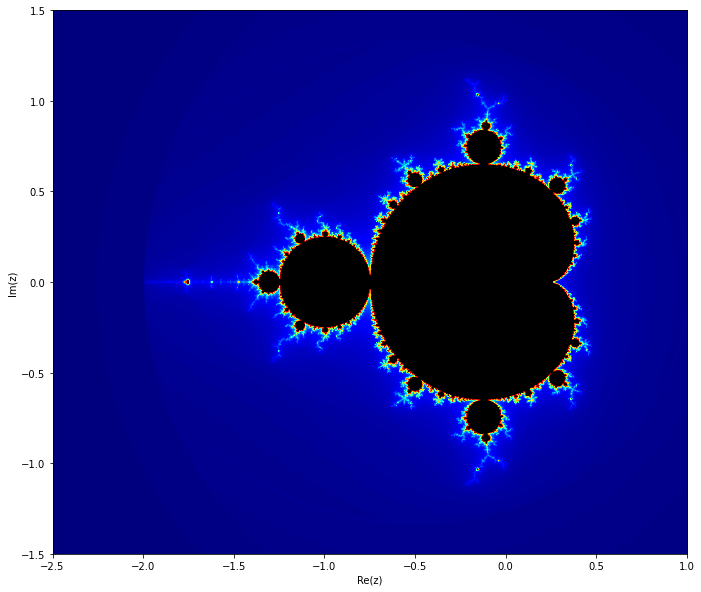

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from numba import jit

@jit(nopython=True)
def mandelbrot_iterations(a, b, maxiter):
    """
    This function performs the Mandelbrot iterations on a point in the 
    complex plane at a+bi. Iterations cease when |z|>2 or if the maximum
    iteration number has been exceeded. The current iteration number is
    returned.
    """
    a0, b0 = a, b
    for n in range(maxiter+1):      
        if a**2 + b**2 > 4:          
            # Smooth colours using normalized iteration count 
            n = n + 1 - np.log2(np.log2(a**2 + b**2))
            break
        a, b = a**2 - b**2 + a0, 2*a*b + b0
    
    return n

@jit(nopython=True)
def mandelbrot_set(xmin, xmax, ymin, ymax, maxiter):
    """
    This function generates the Mandelbrot set for the real values
    the range [xmin, xmax] and imaginary values [ymin, ymax].
    """
    # Setup pixel array
    img = np.zeros((height, width))
    
    # Calculate real and imaginary vales
    a = np.linspace(xmin, xmax, width)
    b = np.linspace(ymin, ymax, height)

    # Loop through pixels and calculate iterative scheme
    for i in range(height):
        for j in range(width):
            img[i,j] = mandelbrot_iterations(a[j], b[i], maxiter)
    
    return img[::-1,:]

# Define parameters 
height, width = 1200, 800 # number of pixels
maxiter = 100             # max number of iterations used

# Generate Mandelbrot set
xmin, xmax, ymin, ymax = -2.5, 1, -1.5, 1.5
img = mandelbrot_set(xmin, xmax, ymin, ymax, maxiter)

# Add layer of black to the 'jet' colormap
jet = cm.get_cmap('jet', 256)
newcolors = jet(np.linspace(0, 1, 256))
newcolors[-1:, :] = np.array([0, 0, 0, 1])
mycmap = ListedColormap(newcolors)

# Plot Mandelbrot set
dpi = 80
figsize = height/dpi, width/dpi
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(img, cmap=mycmap, extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
plt.show()

We can explore the Mandelbrot set by changing the values of `xmin`, `xmax`, `ymin`, `ymax` and `maxiter` and calling the `mandelbrot_set` function again to regenerate the `img` array. Uncomment/comment the lines below to see the results.

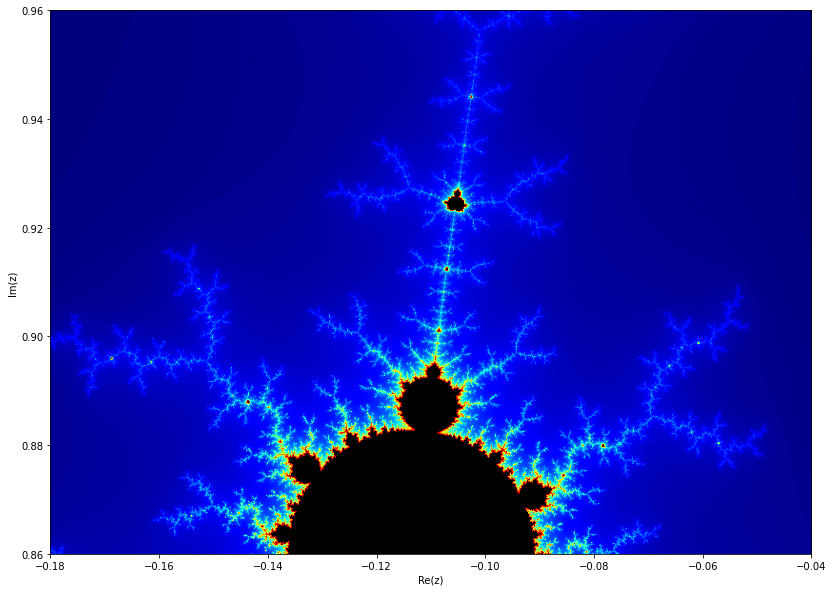

In [7]:
# Generate Mandelbrot set
xmin, xmax, ymin, ymax = -0.18, -0.04, 0.86, 0.96
# xmin, xmax, ymin, ymax = -0.8, -0.77, 0.135, 0.155
# xmin, xmax, ymin, ymax = -0.134, -0.124, 0.984, 0.992
# xmin, xmax, ymin, ymax = -0.749, -0.747, 0.1225, 0.1240
maxiter = 200
img = mandelbrot_set(xmin, xmax, ymin, ymax, maxiter)

# Plot Mandelbrot set
dpi = 80
figsize = height/dpi, width/dpi
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(img, cmap=mycmap, extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
plt.show()

---
## Solving a system of ODEs

The well known [SIRD model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIRD_model) is a system of 4 Ordinary Differential Equations (ODEs) that model the dynamics of an epidemic, e.g., the flu. 

\begin{align*}
    \frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta I S}{N}, \\
    \frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta IS}{N} - \gamma I - \mu I, \\
    \frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I, \\
    \frac{\mathrm{d}D}{\mathrm{d}t} &= \mu I.
\end{align*}

where $S$ is the number of people susceptible to the virus, $I$ is the number of people infected, $R$ is the number of people who have recovered, $D$ is the number of people who have died and $N= S+I+R+D$ is the total number of people in the population. The model parameters are $\beta$, $\gamma$ and $\mu$ which are the rates of infection, recovery and mortality respectively.

The program below solves the SIRD system for the initial value problem $S(0)=999$, $I(0)=1$, $R(0)=D(0)=0$ with $\beta=0.3$, $\gamma = 0.05$ and $\mu=0.01$ using a Runge-Kutta method. Here we used the function `solve_ivp` from the [SciPy](https://docs.scipy.org/doc/scipy/reference/) library.


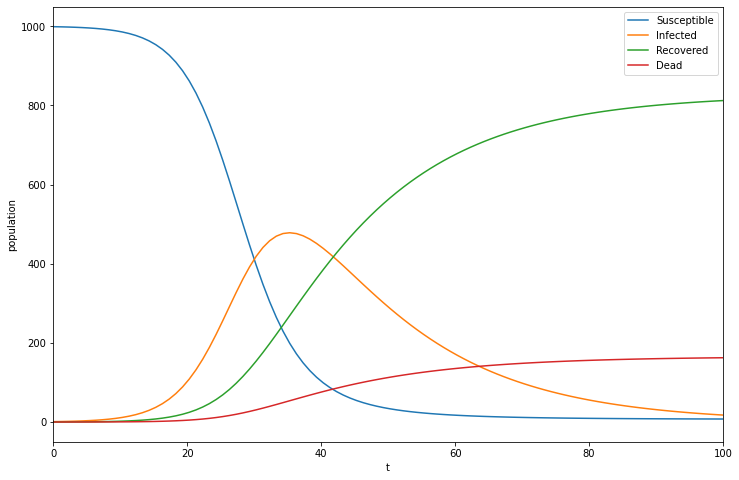

In [9]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SIRD_model(t, y):
    """
    This function defines the SIRD system of ODEs
    """
    # Unpack y array
    S, I, R, D = y
    N = sum(y)
    
    # Define SIRD system
    dydt = np.zeros(4)
    dydt[0] = -beta*I*S/N
    dydt[1] = beta*I*S/N - gamma*I - mu*I
    dydt[2] = gamma*I
    dydt[3] = mu*I
    
    return dydt

# Define IVP
y0 = [999, 1, 0, 0]
t = [0, 100]
beta, gamma, mu = 0.3, 0.05, 0.01

# Solve IVP (using 4/5th order Runge-Kutta method)
sol = solve_ivp(SIRD_model, t, y0, method='RK45', max_step=1)

# Plot solution
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(sol.t, sol.y.T)

ax.set_xlabel('t')
ax.set_ylabel('population')
ax.legend(['Susceptible', 'Infected', 'Recovered', 'Dead'])
ax.set_xlim(0, 100)

plt.show()

<font size="2"><i>Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University</i></font>